学年クラス：3C　学籍番号：b2181930　氏名：西村貴志

***
# 演習1.
決定木は、木構造の形をとる意思決定を助けるグラフである。特に機械学習の分野においては、特徴がよく現れるようなデータのかたまりを見つけ、その分類ルールを生成する予測モデルのことをいう。
***

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn
%precision 3


'%.3f'

In [2]:
import requests, zipfile
import io
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                    'ring_number','ring_type','spore_print_color','population','habitat']
mushroom.head()


,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print('データの形式:{}'.format(mushroom.shape))
print('データの欠損数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
データの欠損数:0


In [4]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)
mushroom_dummy


,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [7]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [8]:
-0.5*np.log2(0.5)-0.5*np.log2(0.5)


1.0

In [9]:
-0.001*np.log2(0.001)-0.999*np.log2(0.999)


0.011407757737461138

In [10]:
def calc_entropy(p):
    return ( -p * np.log2(p) - (1-p) * np.log2(1-p) )

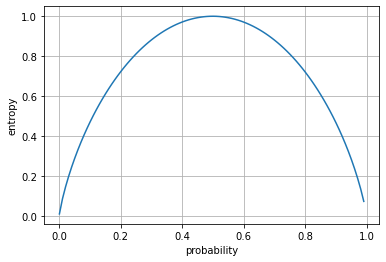

In [11]:
p = np.arange(0.001,0.999,0.01)
plt.plot(p, calc_entropy(p))
plt.xlabel('probability')
plt.ylabel('entropy')
plt.grid(True)

In [12]:
mushroom_dummy.groupby('flg')['flg'].count()


flg
0    4208
1    3916
Name: flg, dtype: int64

In [13]:
p_init = 4208 / (4208 + 3916)
p_init

0.518

In [14]:
entropy_init = -p_init*np.log2(p_init) - (1 - p_init)*np.log2(1 - p_init)
print('初期値:{:.3f}'.format(entropy_init))


初期値:0.999


In [15]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()


flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [16]:
p_ccc0 = 4176 / (4176 + 3914)
entropy_ccc0 = - p_ccc0*np.log2(p_ccc0) - (1 - p_ccc0)*np.log2(1 - p_ccc0)
print('cap_color_c=0:{:.3f}'.format(entropy_ccc0))


cap_color_c=0:0.999


In [17]:
p_ccc1 = 32 / (32 + 12)
entropy_ccc1 = - p_ccc1*np.log2(p_ccc1) - (1 - p_ccc1)*np.log2(1 - p_ccc1)
print('cap_color_c=1:{:.3f}'.format(entropy_ccc1))


cap_color_c=1:0.845


In [18]:
entropy_ccc_after = (4176+3904)/(4208+3916)*entropy_ccc0 + (32+12)/(4208+3916)*entropy_ccc1
print('cap_color_cを選択後のエントロピー:{:.3f}'.format(entropy_ccc_after))


cap_color_cを選択後のエントロピー:0.998


In [19]:
print('説明変数cap_color_cを選択した情報利得：{:.3f}'.format(entropy_init - entropy_ccc_after))


説明変数cap_color_cを選択した情報利得：0.001


In [20]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()


flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [21]:
p_gcb0 = 4208 / (4208 + 2188)
entropy_gcb0 = - p_gcb0*np.log2(p_gcb0) - (1 - p_gcb0)*np.log2(1 - p_gcb0)
print('gill_color_b=0:{:.3f}'.format(entropy_gcb0))


gill_color_b=0:0.927


In [22]:
p_gcb1 = 0 / (0 + 1728)
entropy_gcb1 = - (1 - p_gcb1)*np.log2(1 - p_gcb1)
print('gill_color_b=1:{:.3f}'.format(entropy_gcb1))


gill_color_b=1:-0.000


In [23]:
entropy_gcb_after = (4208+2188)/(4208+3916)*entropy_gcb0 + (0+1728)/(4208+3916)*entropy_gcb1
print('gill_color_bを選択後のエントロピー:{:.3f}'.format(entropy_gcb_after))


gill_color_bを選択後のエントロピー:0.730


In [24]:
print('説明変数gill_color_bを選択した情報利得：{:.3f}'.format(entropy_init - entropy_gcb_after))

説明変数gill_color_bを選択した情報利得：0.269


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))


正解率(train):0.883
正解率(test):0.894


# 演習2.
***
k近傍法は、特徴空間における最も近い訓練例に基づいた分類の手法である。ある事項の分類は、その最も近傍にある訓練データによって決定される。
k個の最近傍の訓練例に最も多くつけられているラベルが割り当てられるため、Wikipediaにあるk近傍法の例では、k=3のとき、緑の円は三角が近傍に2つ存在していることから三角と同じクラスに分類される。また最近傍であるk=1のときも同様である。一方k=5のとき、四角の数が三角よりも多くなるため、四角のクラスに分類される。  
2020/11/24 https://ja.wikipedia.org/wiki/k近傍法
***

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [27]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [28]:
training_accuracy = []
test_accuracy = []

In [29]:
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

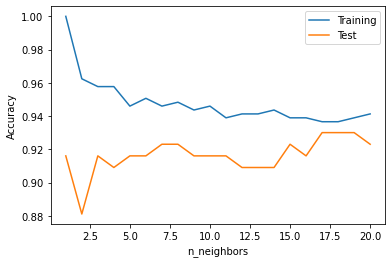

In [30]:
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

***
# 演習3.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

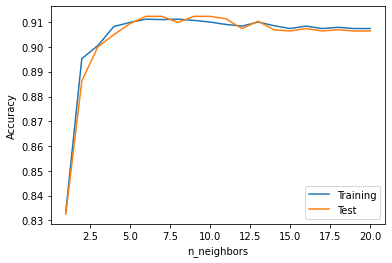

In [32]:
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

***

***
# 演習4.
サポートベクターマシンは、教師あり学習を用いるパターン認識モデルの一つである。訓練サンプルから、各データ点との距離が最大となるように分離する。線形分離が可能な簡単な例について、Wikipediaにある分類の例では、各データ同士の距離が最も遠いH2が黒丸と白丸として隔てている。このとき、2つのクラスで最も近い点からの距離が最大となっている。  
2020/11/24 https://ja.wikipedia.org/wiki/サポートベクターマシン
***

In [33]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)


In [34]:
model = LinearSVC()
model.fit(X_train, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))


正解率(train):0.932
正解率(test):0.923


C:\Users\taka1\anaconda3\envs\DMn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [35]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LinearSVC()
model.fit(X_train_std, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


***
# 演習5.

In [36]:
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)
model = SVC()
model.fit(X_train_std, y_train)
print('SVC正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('SVC正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

SVC正解率(train):0.993
SVC正解率(test):0.958


In [37]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = SVC()
model.fit(X_train_std, y_train)
print('SVC正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('SVC正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

SVC正解率(train):0.993
SVC正解率(test):0.958


LinearSVCは、線形分離によってクラス分類を行う。SVCは、特徴空間における内積をデータから直接計算するカーネル法を用いている。計算複雑度の増大を抑えつつ高次元特徴空間において非線形の分類が可能である。
***